In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

70.71075600171491 -179.59543630096667
39.55438869573976 -135.390762766365
88.93227455900922 -49.768766486594444
41.51725195880843 -99.62020200433845
69.01623197595234 -82.68078230717465
-55.145487280545446 -96.07224603995039
-86.96221780859024 124.067098715133
-8.670185601433886 -78.91164947185712
-14.925501946965468 -153.86286096557674
-60.765082764265 62.61241224027921
-74.12734664179433 -73.65634303422036
-40.38248792548947 175.0350100815678
-62.21205054680391 -29.381508241563324
42.85554088589299 -83.18675964665019
84.03230091348766 107.70195706702276
-83.68804509554636 151.03590634015893
65.78300926275969 122.8492823440368
57.46522102760335 -177.22038514457444
8.222315648511213 105.17790360007393
-49.61229036905472 -152.03138330754368
-43.84592704481588 81.2418769849861
72.41188179109054 118.46936574478974
-62.84862342541743 159.2529909509243
74.1624312967499 70.92650261651539
-12.08583906116884 -170.45840208107828
48.276814919708215 -45.61363564269638
0.10674362286079031 150.7540

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d38196a199a8a0ee781a866d25d0ca4a


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | lexington
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | viru
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | foxton
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | auburn hills
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | ca mau
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | yar-s

Processing Record 42 of Set 4 | strelka
Processing Record 43 of Set 4 | kindu
Processing Record 44 of Set 4 | hukuntsi
Processing Record 45 of Set 4 | cape girardeau
Processing Record 46 of Set 4 | usakos
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | padang
Processing Record 1 of Set 5 | ciudad bolivar
Processing Record 2 of Set 5 | nueva gerona
Processing Record 3 of Set 5 | gbarnga
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | nguruka
Processing Record 6 of Set 5 | concepcion del oro
Processing Record 7 of Set 5 | ati
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | porto torres
Processing Record 10 of Set 5 | udachnyy
Processing Record 11 of Set 5 | bethel
Processing Record 12 of Set 5 | darnah
Processing Record 13 of Set 5 | college
Processing Record 14 of Set 5 | palmer
Processing Record 15 of Set 5 | quetzaltepec
City not fo

Processing Record 29 of Set 8 | ulladulla
Processing Record 30 of Set 8 | berkakit
Processing Record 31 of Set 8 | manaure
Processing Record 32 of Set 8 | nyurba
Processing Record 33 of Set 8 | hot springs
Processing Record 34 of Set 8 | kysyl-syr
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | belmonte
Processing Record 38 of Set 8 | obo
Processing Record 39 of Set 8 | port macquarie
Processing Record 40 of Set 8 | riverton
Processing Record 41 of Set 8 | melenki
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | koslan
Processing Record 44 of Set 8 | comandau
Processing Record 45 of Set 8 | rocha
Processing Record 46 of Set 8 | koboko
Processing Record 47 of Set 8 | wanxian
Processing Record 48 of Set 8 | tadine
Processing Record 49 of Set 8 | dangriga
Processing Record 50 of Set 8 | sovetskiy
Processing Record 1 of Set 9 | coihaique
Processing Record 2 of Set 9 | shenzhen
Processing Record 3 of

Processing Record 18 of Set 12 | alice town
Processing Record 19 of Set 12 | jahazpur
Processing Record 20 of Set 12 | riyadh
Processing Record 21 of Set 12 | sibu
Processing Record 22 of Set 12 | floriano
Processing Record 23 of Set 12 | marrakesh
Processing Record 24 of Set 12 | stornoway
Processing Record 25 of Set 12 | canyon
Processing Record 26 of Set 12 | baghdad
Processing Record 27 of Set 12 | jinxiang
Processing Record 28 of Set 12 | birmitrapur
Processing Record 29 of Set 12 | varhaug
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | mongo
Processing Record 32 of Set 12 | manado
Processing Record 33 of Set 12 | lac du bonnet
Processing Record 34 of Set 12 | verkhnyaya inta
Processing Record 35 of Set 12 | terrace bay
Processing Record 36 of Set 12 | haines junction
Processing Record 37 of Set 12 | eureka
Processing Record 38 of Set 12 | matay
Processing Record 39 of Set 12 | awjilah
Processing Record 40 of Set 12 | ovalle
Processing Record 41 of Set 12

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,73.85,69,20,5.01,US,2022-06-22 19:59:03
1,Upernavik,72.7868,-56.1549,33.78,90,100,10.13,GL,2022-06-22 19:59:03
2,Lexington,37.9887,-84.4777,96.69,44,5,1.01,US,2022-06-22 19:56:44
3,Clyde River,70.4692,-68.5914,43.03,81,100,13.80,CA,2022-06-22 19:59:03
4,Punta Arenas,-53.1500,-70.9167,41.11,70,40,19.57,CL,2022-06-22 19:56:08
5,New Norfolk,-42.7826,147.0587,49.91,82,100,1.01,AU,2022-06-22 19:59:04
6,Viru,-8.4167,-78.7500,71.69,57,10,10.87,PE,2022-06-22 19:59:04
7,Faanui,-16.4833,-151.7500,80.42,65,12,13.06,PF,2022-06-22 19:59:04
8,Ushuaia,-54.8000,-68.3000,40.62,81,40,33.38,AR,2022-06-22 19:57:02
9,Foxton,-40.4667,175.3000,38.93,92,96,4.27,NZ,2022-06-22 19:59:05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

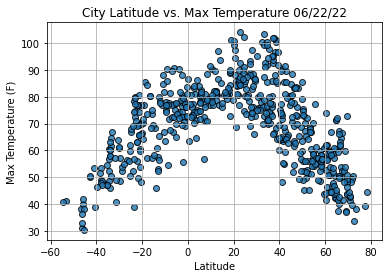

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

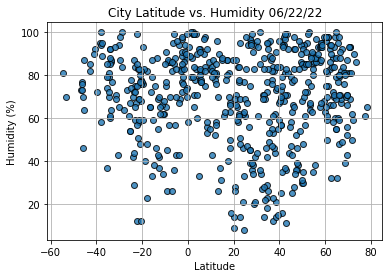

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()